# Linear Regression using Co2 Dataset
# Objective

In [1]:
#Load the dataset
import pandas as pd
co2data=pd.read_csv('d:/Data Science Projects/CO2.csv')
co2data.head()
co2data.columns
co2data.shape


# the data has 13 Columns and 1000 plus records

(1067, 13)

In [2]:
#Check for Null values
print(co2data.isnull().sum().count)

#check for categorical features
co2data.select_dtypes(include=object)

<bound method Series.count of MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64>


,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
1063,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
1064,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
1065,VOLVO,XC70 AWD,SUV - SMALL,AS6,X



##### Study : Co2 emision is prevelant due to several reasons : Big engine(size), SUV models(vechicle class), Aggresive drive, old vechicles(year), Diesel type (fuel type) all have an impact in CO2 emission. This machine learning algorithm not only clasically predicts the emision rate but aids in controling the environmental hazards and pollutions. These kind of research from a data scientist is much awaited and necessary to make science serve humanity.

In [3]:
# Firstly we use correlation matrix for each numeric features wrt target variable
# Identify numerical features
numerical_features = co2data.select_dtypes(include=['int64', 'float64'])
target_variable='CO2EMISSIONS'
corr_matrix=numerical_features.corr()
target_correlation=corr_matrix[target_variable]
print ("Significant Relations :",target_correlation[abs(target_correlation)>0.85])

#the value above finds with target variable, below im dropping the target variable and finding
# Drop the target variable from numerical features
feature_variables = numerical_features.drop(columns=[target_variable])

# Calculate the correlation matrix for the features
feature_corr_matrix = feature_variables.corr()

# Display correlations above a threshold (e.g., 0.85) to identify highly correlated pairs
high_corr_pairs = feature_corr_matrix[(abs(feature_corr_matrix) > 0.85) & (feature_corr_matrix != 1.0)]

print("Highly Correlated Feature Pairs:\n", high_corr_pairs)

Significant Relations : ENGINESIZE                  0.874154
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG   -0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64
Highly Correlated Feature Pairs:
                           MODELYEAR  ENGINESIZE  CYLINDERS  \
MODELYEAR                       NaN         NaN        NaN   
ENGINESIZE                      NaN         NaN   0.934011   
CYLINDERS                       NaN    0.934011        NaN   
FUELCONSUMPTION_CITY            NaN         NaN        NaN   
FUELCONSUMPTION_HWY             NaN         NaN        NaN   
FUELCONSUMPTION_COMB            NaN         NaN        NaN   
FUELCONSUMPTION_COMB_MPG        NaN         NaN        NaN   

                          FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
MODELYEAR                                  NaN                  NaN   
ENGINESIZE                                 NaN

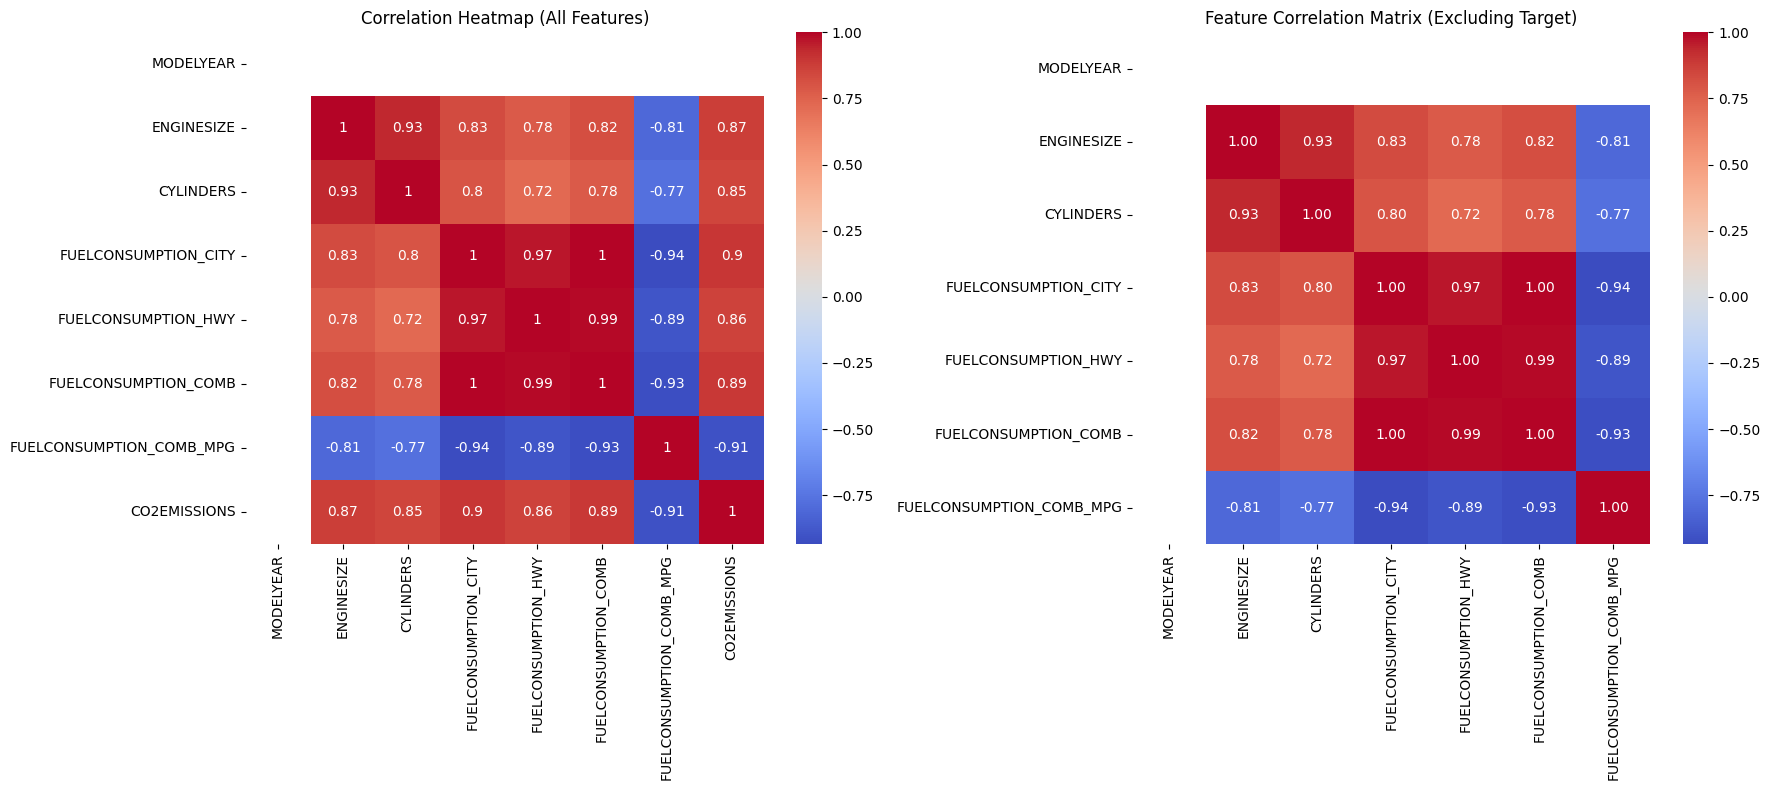

In [9]:
#let us visualise the above WITH AND without target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns, shared figure size

# Heatmap 1: Correlation with all numerical features
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title("Correlation Heatmap (All Features)")

# Heatmap 2: Correlation among features excluding the target
sns.heatmap(feature_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=axes[1])
axes[1].set_title("Feature Correlation Matrix (Excluding Target)")

# Display the plots
plt.tight_layout()
plt.show()


###### observation from the heatmap
Values show that many features are highly corelated showing value > 0.8 this shows the dataset has high multicollinearity (where the coefficients are unstable)

###### Next lets calculate VIF and try to remove the severe collinearity features

In [4]:
# Now lets measure the multicolinearity between features droping the target variable using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Exclude the target variable 'CO2EMISSIONS'
X = numerical_features.drop(columns=['CO2EMISSIONS'])

# Add a constant to the features for VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)



                    Feature           VIF
0                 MODELYEAR    369.958376
1                ENGINESIZE      9.611620
2                 CYLINDERS      8.436901
3      FUELCONSUMPTION_CITY   6205.818515
4       FUELCONSUMPTION_HWY   1957.934535
5      FUELCONSUMPTION_COMB  14816.991136
6  FUELCONSUMPTION_COMB_MPG      8.280955


##### Observation : Very much related features can be removed as it can only cause overlapping.  MODELYEAR, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, and FUELCONSUMPTION_COMB have extremely high VIF values, indicating severe multicollinearity. Consider droping it.

In [5]:
# Drop highly correlated features
data_dropped = co2data.drop(columns=['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'MODELYEAR'])
print(data_dropped.columns)

#Original 
#co2data.columns





Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


### Now lets revisualise the heatmap 
#### Secondly lets apply Regularisation and PCA sepertaely to evaluate the reduction in multicolinearity


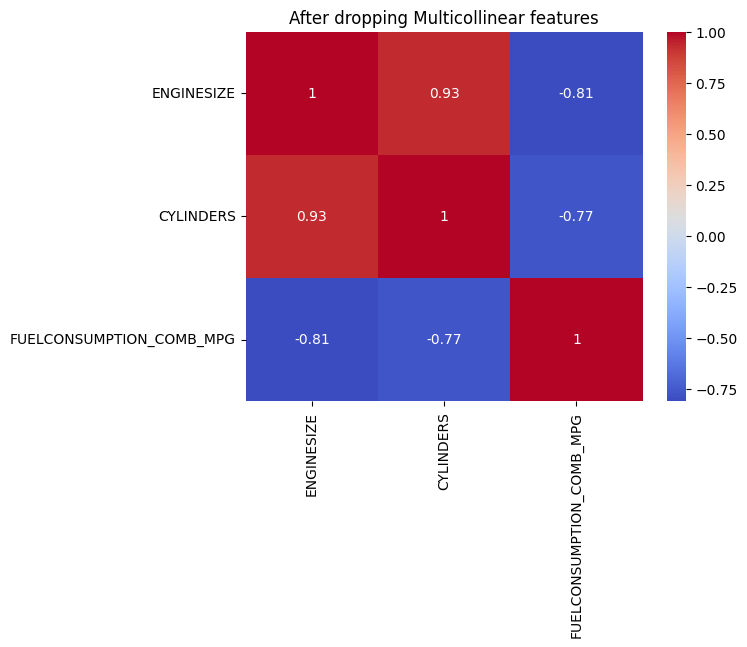

                          ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB_MPG
ENGINESIZE                  1.000000   0.934011                 -0.808554
CYLINDERS                   0.934011   1.000000                 -0.770430
FUELCONSUMPTION_COMB_MPG   -0.808554  -0.770430                  1.000000


In [11]:
#heat map on drop data
# Heatmap 1: Correlation with all numerical features
numerical_data_droped=data_dropped.select_dtypes(include=['int64','float64'])
numerical_data_droped=numerical_data_droped.drop(columns=['CO2EMISSIONS'])
sns.heatmap(numerical_data_droped.corr(), annot=True, cmap='coolwarm')
plt.title("After dropping Multicollinear features")
plt.show()
print(numerical_data_droped.corr())

In [27]:
#VIF on Dropped Features

X = numerical_data_droped

# Add a constant to the features for VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


                    Feature         VIF
0                     const  310.082367
1                ENGINESIZE    9.722575
2                 CYLINDERS    8.195945
3  FUELCONSUMPTION_COMB_MPG    5.682320
4              CO2EMISSIONS    8.613699


#### Observation from heat map and VIF what we learn!!!
##### The value of the correlation map of cylinder and engine size is very high.The possibility of multi collinearity how it affects the predictions or inference?Multi collinearity basically means we are not able to tell in what cosfficient with the x value it affects the y value,meaning, it has relation with other input variable and we are not able make any inference of x with y

In [15]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 6.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 4.2 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 6.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 6.4 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 6.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
#Addressing Multi Colinearity with Regualrisation, PCA and checking each seperately

#Applying Standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x=numerical_data_droped[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB_MPG']]
y=co2data['CO2EMISSIONS']
scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

# Apply Ridge regression (L2 regularization)
ridge = Ridge(alpha=1.0)  # You can tune the alpha (regularization strength)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

# Apply Lasso regression (L1 regularization)
lasso = Lasso(alpha=0.1)  # You can tune the alpha (regularization strength)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

# Evaluate both models using MSE
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")

Ridge Regression MSE: 418.1894154352753
Lasso Regression MSE: 418.60005288777387


In [22]:
#Create Linear Regression model and see the metrics comparision with Ridge and Lasso
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train_scaled,y_train)
y_pred=LR.predict(x_test_scaled)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_LR=mean_squared_error(y_test,y_pred)
mae_LR=mean_absolute_error(y_test,y_pred)
r2_LR=r2_score(y_test,y_pred)

print(f"LR MSE {mse_LR}")
print(f"MAE {mae_LR}")
print(f"R2Score {r2_LR}")
      

LR MSE 418.30745426860364
MAE 13.604676746340903
R2Score 0.8962916167694952


Evaluation Metrics Observation
Linear Regression:
Linear Regression achieves an MSE of 418.31, indicating the model’s average squared prediction error. The MAE (Mean Absolute Error) is 13.60, showing that the model's predictions deviate from the actual CO₂ emissions by an average of 13.60 units. The R² Score of 0.896 suggests that the model explains 89.6% of the variance in CO₂ emissions, demonstrating that it captures the relationship between the features and target variable effectively.

Ridge and Lasso Regression:
Ridge Regression yields an MSE of 418.19, slightly improving on Linear Regression due to the addition of the L2 penalty, which helps stabilize the model and prevent overfitting, especially in the presence of correlated features. Lasso Regression, with an MSE of 418.60, performs similarly but applies an L1 penalty, which shrinks some coefficients to zero for feature selection. However, this simplification leads to a slightly worse MSE compared to Ridge and Linear Regression due to the potential loss of predictive power.

Why PCA is Not Required
PCA is not necessary in this case because the dataset has a limited number of features (only 3). The regularization methods used in Ridge and Lasso are effective in addressing any potential multicollinearity, and feature scaling has already been performed. Furthermore, PCA could reduce interpretability by transforming the features, but in this case, maintaining the original features is crucial to understanding their impact on predicting CO₂ emissions. Therefore, applying PCA would not significantly improve model performance or simplicity.

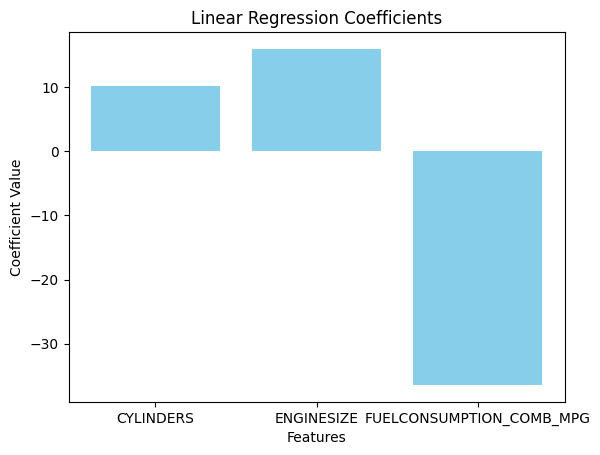

In [24]:
#Data Visualisation on the evaluation 
#Compare Ridge, Lasso and Linear coefficients

# Feature names
features = ['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG']

# Coefficients for Linear Regression
linear_coefficients = LR.coef_

plt.bar(features, linear_coefficients, color='skyblue')
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()



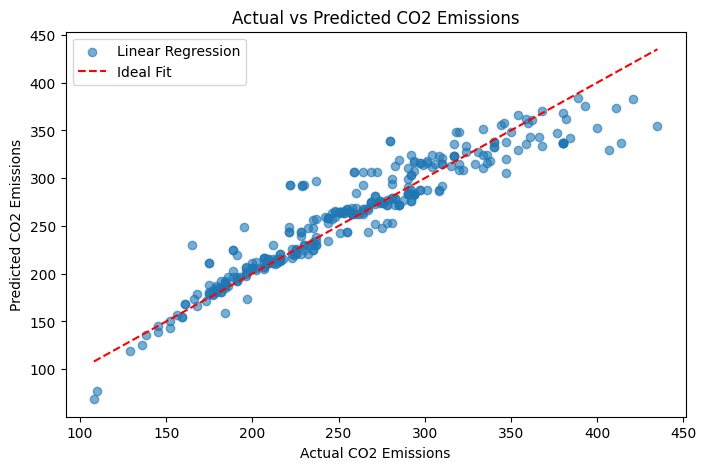

In [25]:
#compare predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, label="Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.show()


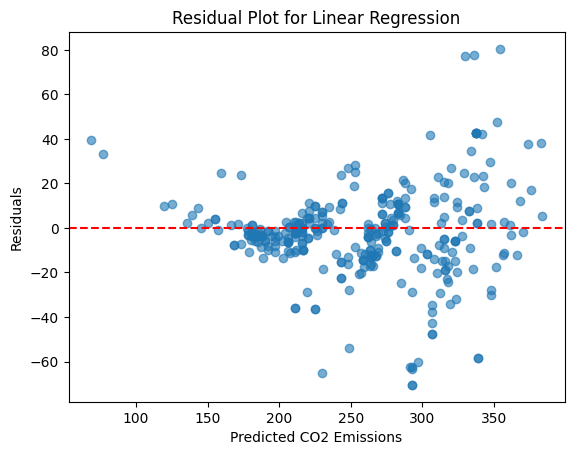

In [ ]:
#Residual Anaysis
#Residual Analysis provides insights into specific problems like non-linearity, 
# outliers, or the need for additional predictors. If residuals are random, the model is likely appropriate.

#MSE is a single number that represents the average magnitude of squared errors. 
# A lower MSE indicates better predictive accuracy. However, it doesn't help with identifying the model's underlying 
# problems (like heteroscedasticity or non-linearity).
import matplotlib.pyplot as plt

# Residuals for Linear Regression
residuals_linear = y_test - y_pred

plt.scatter(y_pred, residuals_linear, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Residuals")
plt.show()


Conclusion Report: Machine Learning Algorithm for CO₂ Emission Prediction
The machine learning models applied in this project—Linear Regression, Ridge Regression, and Lasso Regression—have provided valuable insights into predicting CO₂ emissions based on features like engine size, cylinder count, and fuel consumption. The evaluation metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score, reveal that Linear Regression performs well, explaining approximately 89.6% of the variance in CO₂ emissions. Ridge and Lasso regression, through the use of regularization, showed slightly better handling of multicollinearity, with Ridge achieving marginally lower MSE than Lasso. However, Lasso’s feature selection mechanism can potentially lead to loss in predictive power due to its tendency to shrink coefficients to zero.

Despite the small differences in model performance, the key takeaway is that the inclusion of regularization helps address overfitting, a critical aspect when dealing with complex real-world data. The R² Score for Linear Regression indicates that the model is capable of making reliable predictions, while the MAE gives us a clear sense of how close the model’s predictions are to the actual values.

Significance of the Project
This project holds significant value in the automotive industry and environmental studies, as it demonstrates how machine learning can be leveraged to predict CO₂ emissions, an essential metric for understanding the environmental impact of vehicles. By using features such as engine size, cylinders, and fuel consumption, the model can help in the design of more efficient vehicles, contributing to sustainability efforts.

Furthermore, it serves as an example of practical machine learning applications for industries focused on emissions reduction. The ability to predict CO₂ emissions accurately can aid policymakers in setting emission standards, and can guide manufacturers towards making environmentally friendly choices. The methods of Ridge and Lasso Regression also provide a way to handle multicollinearity and reduce model complexity, which is essential for interpretability in real-world applications.

In conclusion, the project not only provides a solid understanding of regression techniques but also contributes to the broader goal of sustainable innovation by providing tools to predict and minimize CO₂ emissions. The knowledge and techniques developed here can be further enhanced and expanded to include more features, or even other datasets, for more accurate and comprehensive environmental forecasting.







